In [1]:
import zdb
import glob
import os
import oyaml as yaml

In [2]:
help(zdb.modules.analyse)

Help on function analyse in module zdb.modules.analyse:

analyse(config, mode='multiprocesing', ncores=0, nfiles=-1, batch_opts='', output=None, chunksize=500000, merge_opts={})



In [3]:
def generate_yaml(hists, filepath):
    hists_def = {
        k: [
            {"table": "df: '{table_name}'"},
            {"varname0": "df: '{}'".format(k)},
            {"selection": "df: '{selection_name}'"},
            {"parent": "df: df.parent"},
            {"sample": "df: df['sample']"},
            {"binvar0": "df: df.{}_bin".format(k)},
            {"count": "df: 1."},
            {"sum_w": "df: {weight}"},
            {"sum_ww": "df: df.sum_w**2"},
        ] for k in hists
    }

    cutflows = {
        "Inclusive": {
            "selection_name": "Inclusive",
            "selection": "METnoX_pt>=-999.",
            "weight": "df.Weight_Inclusive",
            "hists": [h for h in hists_def.keys()],
        },
    }

    weight = ["df.WeightXsLumi", "df.WeightQcdEwk"]
        
    cfg_eval = [
        {"parent": "df: np.where( df.parent.isin(['WJetsToLNu', 'DYJetsToLL']), np.where( df.parent=='WJetsToLNu', np.where( df.LeptonIsElectron, np.full_like(df.parent, 'WJetsToENu'), np.where( df.LeptonIsMuon, np.full_like(df.parent, 'WJetsToMuNu'), np.where( df.LeptonIsTau, np.full_like(df.parent, 'WJetsToTauNu'), np.full_like(df.parent, 'WJetsToLNu'),),),), np.where( df.parent=='DYJetsToLL', np.where( df.LeptonIsElectron, np.full_like(df.parent, 'DYJetsToEE'), np.where( df.LeptonIsMuon, np.full_like(df.parent, 'DYJetsToMuMu'), np.where( df.LeptonIsTau, np.where( df.nGenTauL==0, np.full_like(df.parent, 'DYJetsToTauHTauH'), np.where( df.nGenTauL==1, np.full_like(df.parent, 'DYJetsToTauHTauL'), np.where( df.nGenTauL==2, np.full_like(df.parent, 'DYJetsToTauLTauL'), np.full_like(df.parent, 'DYJetsToTauTau'),),),), np.full_like(df.parent, 'DYJetsToLL'),),),), df.parent,),), df.parent,)"},
        {"Weight_Inclusive": "df: (" + ")*(".join(weight)+")"},
        {"GenPartBoson_pt_bin": "df: np.floor(df.GenPartBoson_pt/5.)*5"},
        {"GenPartBoson_eta_bin": "df: np.floor(df.GenPartBoson_eta/0.1)*0.1"},
        {"GenPartBoson_phi_bin": "df: np.floor(df.GenPartBoson_phi/0.06283)*0.06283"},
        {"GenPartBoson_mass_bin": "df: np.floor(df.GenPartBoson_mass/1.)*1"},
        {"METnoX_pt_bin": "df: np.floor(df.METnoX_pt/5.)*5"},
        {"METnoX_phi_bin": "df: np.floor(df.METnoX_phi/0.06283)*0.06283"},
        {"METnoX_sumEt_bin": "df: np.floor(df.METnoX_sumEt/50.)*50"},
        {"MET_pt_bin": "df: np.floor(df.MET_pt/5.)*5"},
        {"MET_phi_bin": "df: np.floor(df.MET_phi/0.06283)*0.06283"},
        {"MET_sumEt_bin": "df: np.floor(df.MET_sumEt/50.)*50"},
        {"CaloMET_pt_bin": "df: np.floor(df.CaloMET_pt/5.)*5"},
        {"CaloMET_phi_bin": "df: np.floor(df.CaloMET_phi/0.06283)*0.06283"},
        {"CaloMET_sumEt_bin": "df: np.floor(df.CaloMET_sumEt/50.)*50"},
        {"PuppiMET_pt_bin": "df: np.floor(df.PuppiMET_pt/5.)*5"},
        {"PuppiMET_phi_bin": "df: np.floor(df.PuppiMET_phi/0.06283)*0.06283"},
        {"PuppiMETnoX_pt_bin": "df: np.floor(df.PuppiMETnoX_pt/5.)*5"},
        {"PuppiMETnoX_phi_bin": "df: np.floor(df.PuppiMETnoX_phi/0.06283)*0.06283"},
        {"MET_dCaloMET_bin": "df: np.floor(df.MET_dCaloMET/0.02)*0.02"},
        {"MinDPhiJ1234METnoX_bin": "df: np.floor(df.MinDPhiJ1234METnoX/0.05)*0.05"},
        {"MinDPhiJ1234PuppiMETnoX_bin": "df: np.floor(df.MinDPhiJ1234PuppiMETnoX/0.05)*0.05"},
        {"MTW_bin": "df: np.floor(df.MTW/4.)*4"},
        {"MLL_bin": "df: np.floor(df.MLL/0.5)*0.5"},
        {"nJetVeto_bin": "df: np.floor(df.nJetVeto/1.)*1"},
        {"nJetSelection_bin": "df: np.floor(df.nJetSelection/1.)*1"},
        {"LeadJetSelection_pt_bin": "df: np.floor(df.LeadJetSelection_pt/5.)*5"},
        {"LeadJetSelection_eta_bin": "df: np.floor(df.LeadJetSelection_eta/0.1)*0.1"},
        {"LeadJetSelection_phi_bin": "df: np.floor(df.LeadJetSelection_phi/0.06283)*0.06283"},
        {"LeadJetSelection_chHEF_bin": "df: np.floor(df.LeadJetSelection_chHEF/0.01)*0.01"},
        {"LeadJetSelection_neHEF_bin": "df: np.floor(df.LeadJetSelection_neHEF/0.01)*0.01"},
        {"SecondJetSelection_pt_bin": "df: np.floor(df.SecondJetSelection_pt/5.)*5"},
        {"SecondJetSelection_eta_bin": "df: np.floor(df.SecondJetSelection_eta/0.1)*0.1"},
        {"SecondJetSelection_phi_bin": "df: np.floor(df.SecondJetSelection_phi/0.06283)*0.06283"},
        {"LeadJetFwdSelection_pt_bin": "df: np.floor(df.LeadJetFwdSelection_pt/1.)*1"},
        {"LeadJetFwdSelection_eta_bin": "df: np.floor(df.LeadJetFwdSelection_eta/0.1)*0.1"},
        {"LeadJetFwdSelection_phi_bin": "df: np.floor(df.LeadJetFwdSelection_phi/0.06283)*0.06283"},
        {"NearestJetSelectionMET_pt_bin": "df: np.floor(df.NearestJetSelectionMET_pt/1.)*1"},
        {"NearestJetSelectionMET_eta_bin": "df: np.floor(df.NearestJetSelectionMET_eta/0.1)*0.1"},
        {"NearestJetSelectionMET_phi_bin": "df: np.floor(df.NearestJetSelectionMET_phi/0.06283)*0.06283"},
        {"nMuonVeto_bin": "df: np.floor(df.nMuonVeto/1.)*1"},
        {"nMuonSelection_bin": "df: np.floor(df.nMuonSelection/1.)*1"},
        {"LeadMuonSelection_pt_bin": "df: np.floor(df.LeadMuonSelection_pt/5.)*5"},
        {"LeadMuonSelection_eta_bin": "df: np.floor(df.LeadMuonSelection_eta/0.1)*0.1"},
        {"LeadMuonSelection_phi_bin": "df: np.floor(df.LeadMuonSelection_phi/0.06283)*0.06283"},
        {"SecondMuonSelection_pt_bin": "df: np.floor(df.SecondMuonSelection_pt/5.)*5"},
        {"SecondMuonSelection_eta_bin": "df: np.floor(df.SecondMuonSelection_eta/0.1)*0.1"},
        {"SecondMuonSelection_phi_bin": "df: np.floor(df.SecondMuonSelection_phi/0.06283)*0.06283"},
        {"nElectronVeto_bin": "df: np.floor(df.nElectronVeto/1.)*1"},
        {"nElectronSelection_bin": "df: np.floor(df.nElectronSelection/1.)*1"},
        {"LeadElectronSelection_pt_bin": "df: np.floor(df.LeadElectronSelection_pt/5.)*5"},
        {"LeadElectronSelection_eta_bin": "df: np.floor(df.LeadElectronSelection_eta/0.1)*0.1"},
        {"LeadElectronSelection_phi_bin": "df: np.floor(df.LeadElectronSelection_phi/0.06283)*0.06283"},
        {"SecondElectronSelection_pt_bin": "df: np.floor(df.SecondElectronSelection_pt/5.)*5"},
        {"SecondElectronSelection_eta_bin": "df: np.floor(df.SecondElectronSelection_eta/0.1)*0.1"},
        {"SecondElectronSelection_phi_bin": "df: np.floor(df.SecondElectronSelection_phi/0.06283)*0.06283"},
        {"nTauVeto_bin": "df: np.floor(df.nTauVeto/1.)*1"},
        {"nTauSelection_bin": "df: np.floor(df.nTauSelection/1.)*1"},
        {"LeadTauSelection_pt_bin": "df: np.floor(df.LeadTauSelection_pt/5.)*5"},
        {"LeadTauSelection_eta_bin": "df: np.floor(df.LeadTauSelection_eta/0.1)*0.1"},
        {"LeadTauSelection_phi_bin": "df: np.floor(df.LeadTauSelection_phi/0.06283)*0.06283"},
        {"nIsoTrack_bin": "df: np.floor(df.nIsoTrack/1.)*1"},
        {"LeadIsoTrack_pt_bin": "df: np.floor(df.LeadIsoTrack_pt/1.)*1"},
        {"LeadIsoTrack_eta_bin": "df: np.floor(df.LeadIsoTrack_eta/0.1)*0.1"},
        {"LeadIsoTrack_phi_bin": "df: np.floor(df.LeadIsoTrack_phi/0.06283)*0.06283"},
        {"LeadIsoTrack_pdgId_bin": "df: np.floor(df.LeadIsoTrack_pdgId/1.)*1"},
        {"nPhotonVeto_bin": "df: np.floor(df.nPhotonVeto/1.)*1"},
        {"nPhotonSelection_bin": "df: np.floor(df.nPhotonSelection/1.)*1"},
        {"nBJetVeto_bin": "df: np.floor(df.nBJetVeto/1.)*1"},
        {"LeptonCharge_bin": "df: np.floor(df.LeptonCharge/1.)*1"},
        {"PV_npvsGood_bin": "df: np.floor(df.PV_npvsGood/1.)*1"},
    ]

    cfg = {
        "query": {
            "groupby": ["table", "varname0", "selection", "parent", "sample", "binvar0"],
            "tables": {"central": "Events"},
            "aliases": {},
            "eval": cfg_eval,
            "cutflows": cutflows,
            "hists": hists_def,
        },
        "files": sorted(p for p in glob.glob(filepath)),
    }
    
    return cfg

In [5]:
hists = [
    "GenPartBoson_pt",
    "GenPartBoson_eta",
    "GenPartBoson_phi",
    "GenPartBoson_mass",
    "METnoX_pt", "METnoX_phi",
    "MET_pt", "MET_phi",
    "CaloMET_pt", "CaloMET_phi",
    "MET_dCaloMET",
    "MinDPhiJ1234METnoX",
    "MTW", "MLL",
    "nJetVeto", "nJetSelection",
    "LeadJetSelection_pt", "LeadJetSelection_eta", "LeadJetSelection_phi", "LeadJetSelection_chHEF", "LeadJetSelection_neHEF",
    "nMuonVeto", "nMuonSelection",
    "LeadMuonSelection_pt", "LeadMuonSelection_eta", "LeadMuonSelection_phi",
    "SecondMuonSelection_pt", "SecondMuonSelection_eta", "SecondMuonSelection_phi",
    "nElectronVeto", "nElectronSelection",
    "LeadElectronSelection_pt", "LeadElectronSelection_eta", "LeadElectronSelection_phi",
    "SecondElectronSelection_pt", "SecondElectronSelection_eta", "SecondElectronSelection_phi",
    "nTauVeto", "nTauSelection",
    "LeadTauSelection_pt", "LeadTauSelection_eta", "LeadTauSelection_phi",
    "nPhotonVeto", "nPhotonSelection", "nBJetVeto",
    "LeptonCharge", "PV_npvsGood",
]

cfg = generate_yaml(hists, "/vols/cms/sdb15/Analysis/ZinvWidth/databases/2019/08_Aug/28_Legacy/MC/*.h5")
with open("configs/hists/mc_inclusive.yaml", "w") as f:
    yaml.dump(cfg, f, indent=4)

## Submit

In [7]:
zdb.modules.multi_analyse(
    ["configs/hists/mc_inclusive.yaml"],
    outputs=["dists_inclusive.h5:MCAggEvents"],
    mode='sge',
    ncores=400,
    batch_opts="-q hep.q -l h_rt=3:0:0 -l h_vmem=12G",
    chunksize=250_000,
    merge_opts={"mode": "sge", "ncores": 25, "batch_opts": "-q hep.q"},
)

2019-09-15 09:57:48,715 - pysge.area - INFO - Creating paths in /vols/build/cms/sdb15/ZinvWidth/zinv-notebooks/notebooks/distributions/_ccsp_temp/tpd_20190915_095748_y914_jiy
INFO:pysge.area:Creating paths in /vols/build/cms/sdb15/ZinvWidth/zinv-notebooks/notebooks/distributions/_ccsp_temp/tpd_20190915_095748_y914_jiy


2019-09-15 09:57:58,959 - pysge.submitter - INFO - Submitted 9723435.1-400:1
INFO:pysge.submitter:Submitted 9723435.1-400:1


2019-09-15 10:48:01,837 - pysge.area - INFO - Creating paths in /vols/build/cms/sdb15/ZinvWidth/zinv-notebooks/notebooks/distributions/_ccsp_temp/tpd_20190915_104801_h1s3rb4f
INFO:pysge.area:Creating paths in /vols/build/cms/sdb15/ZinvWidth/zinv-notebooks/notebooks/distributions/_ccsp_temp/tpd_20190915_104801_h1s3rb4f


2019-09-15 10:48:02,294 - pysge.submitter - INFO - Submitted 9723446.1-25:1
INFO:pysge.submitter:Submitted 9723446.1-25:1


[]

## Draw

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import dftools

plt.style.use("cms")

In [24]:
df = pd.read_hdf("dists_inclusive.h5", "MCAggEvents")
df.head(10)

count  \
table   varname0    selection parent     sample                 binvar0            
central CaloMET_phi Inclusive DYJetsToEE DYJetsToLL_Pt-100To250 -3.14150  7489.0   
                                                                -3.07867  7549.0   
                                                                -3.01584  8161.0   
                                                                -2.95301  7798.0   
                                                                -2.89018  7938.0   
                                                                -2.82735  7879.0   
                                                                -2.76452  7948.0   
                                                                -2.70169  8082.0   
                                                                -2.63886  8270.0   
                                                                -2.57603  8016.0   

                                                                               sum_w  \
table   varname0    selection parent     sample                 binvar0                
central CaloMET_phi Inclusive DYJetsToEE DYJetsToLL_Pt-100To250 -3.14150  238.629616   
                                                                -3.07867  282.304593   
                                                                -3.01584  279.916367   
                                                                -2.95301  270.210144   
                                                                -2.89018  279.147178   
                                                                -2.82735  276.802020   
                                                                -2.76452  287.691632   
                                                                -2.70169  274.761052   
                                                                -2.63886  289.348355   
                                                                -2.57603  299.164419   

                                                                             sum_ww  
table   varname0    selection parent     sample                 binvar0              
central CaloMET_phi Inclusive DYJetsToEE DYJetsToLL_Pt-100To250 -3.14150  71.654403  
                                                                -3.07867  72.232151  
                                                                -3.01584  78.129538  
                                                                -2.95301  74.659668  
                                                                -2.89018  75.982288  
                                                                -2.82735  75.394234  
                                                                -2.76452  76.091140  
                                                                -2.70169  77.388732  
                                                                -2.63886  79.187872  
                                                                -2.57603  76.726659

In [25]:
list(df.index.get_level_values("parent").unique())

['DYJetsToEE',
 'DYJetsToMuMu',
 'DYJetsToTauHTauH',
 'DYJetsToTauHTauL',
 'DYJetsToTauLTauL',
 'Diboson',
 'EWKV2Jets',
 'G1Jet',
 'QCD',
 'SingleTop',
 'TTJets',
 'VGamma',
 'WJetsToENu',
 'WJetsToMuNu',
 'WJetsToTauNu',
 'ZJetsToNuNu']

In [67]:
binning = np.arange(0., 1501., 25.)

df_merge = dftools.transform.merge(df, {"WJetsToLNu": ["WJetsToENu", "WJetsToMuNu", "WJetsToTauNu"]})
df_slice = df_merge.loc[("central", "GenPartBoson_pt", "Inclusive", "WJetsToLNu")]
df_slice = df_slice.reset_index()
df_slice.loc[:,"sample"] = df_slice["sample"].str.replace("_ext1", "").str.replace("_ext2", "").str.replace("_ext3", "")
df_slice = df_slice.groupby(["sample", "binvar0"]).sum()
df_slice = dftools.transform.rebin(df_slice, binning)
df_pivot = pd.pivot_table(df_slice, values=["sum_w"], index=["binvar0"], columns=["sample"], aggfunc="sum")

(0.0, 1525.0)

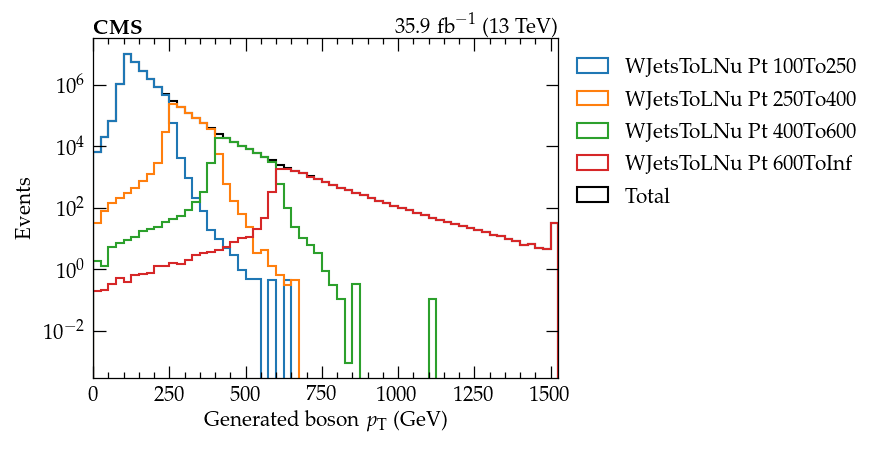

In [68]:
fig, ax = plt.subplots(
    figsize=(4, 3), dpi=150,
)

bins = np.array(list(binning)+[2*binning[-1]-binning[-2]])
for proc in [
    "WJetsToLNu_Pt-100To250",
    "WJetsToLNu_Pt-250To400",
    "WJetsToLNu_Pt-400To600",
    "WJetsToLNu_Pt-600ToInf",
]:
    ax.hist(
        bins[:-1],
        bins = bins,
        weights = df_pivot.loc[:,("sum_w", proc)],
        histtype = 'step',
        label = proc.replace("_", " ").replace("-", " "),
    )
    
ax.hist(
    bins[:-1],
    bins = bins,
    weights = df_pivot.sum(axis=1),
    histtype = 'step',
    color = 'black',
    label = "Total",
    zorder = -1,
)
    
ax.legend(bbox_to_anchor=(1., 1.), loc="upper left")
dftools.draw.cms_label(ax, "")
ax.set_xlabel(r'Generated boson $p_{\mathrm{T}}$ (GeV)')
ax.set_ylabel(r'Events')
ax.set_yscale('log')
ax.set_xlim(bins[0], bins[-1])

In [69]:
binning = np.arange(0., 1501., 25.)

df_merge = dftools.transform.merge(df, {"DYJetsToLL": ["DYJetsToEE", "DYJetsToMuMu", "DYJetsToTauLTauL", "DYJetsToTauHTauH", "DYJetsToTauHTauL"]})
df_slice = df_merge.loc[("central", "GenPartBoson_pt", "Inclusive", "DYJetsToLL")]
df_slice = df_slice.reset_index()
df_slice.loc[:,"sample"] = df_slice["sample"].str.replace("_ext1", "").str.replace("_ext2", "").str.replace("_ext3", "")
df_slice = df_slice.groupby(["sample", "binvar0"]).sum()
df_slice = dftools.transform.rebin(df_slice, binning)
df_pivot = pd.pivot_table(df_slice, values=["sum_w"], index=["binvar0"], columns=["sample"], aggfunc="sum")

(0.0, 1525.0)

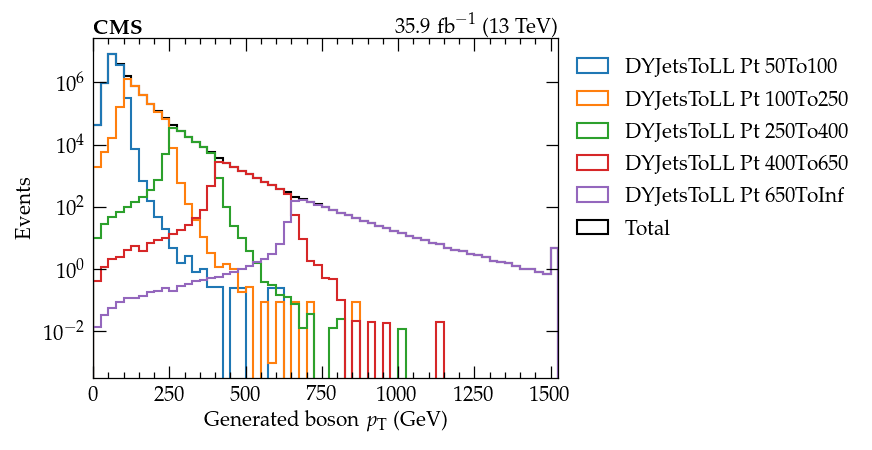

In [70]:
fig, ax = plt.subplots(
    figsize=(4, 3), dpi=150,
)

bins = np.array(list(binning)+[2*binning[-1]-binning[-2]])
for proc in [
    "DYJetsToLL_Pt-50To100",
    "DYJetsToLL_Pt-100To250",
    "DYJetsToLL_Pt-250To400",
    "DYJetsToLL_Pt-400To650",
    "DYJetsToLL_Pt-650ToInf",
]:
    ax.hist(
        bins[:-1],
        bins = bins,
        weights = df_pivot.loc[:,("sum_w", proc)],
        histtype = 'step',
        label = proc.replace("_", " ").replace("-", " "),
    )
    
ax.hist(
    bins[:-1],
    bins = bins,
    weights = df_pivot.sum(axis=1),
    histtype = 'step',
    color = 'black',
    label = "Total",
    zorder = -1,
)
    
ax.legend(bbox_to_anchor=(1., 1.), loc="upper left")
dftools.draw.cms_label(ax, "")
ax.set_xlabel(r'Generated boson $p_{\mathrm{T}}$ (GeV)')
ax.set_ylabel(r'Events')
ax.set_yscale('log')
ax.set_xlim(bins[0], bins[-1])

In [71]:
binning = np.arange(0., 1501., 25.)

df_slice = df.loc[("central", "GenPartBoson_pt", "Inclusive", "ZJetsToNuNu")]
df_slice = df_slice.reset_index()
df_slice.loc[:,"sample"] = df_slice["sample"].str.replace("_ext1", "").str.replace("_ext2", "").str.replace("_ext3", "")
df_slice = df_slice.groupby(["sample", "binvar0"]).sum()
df_slice = dftools.transform.rebin(df_slice, binning)
df_pivot = pd.pivot_table(df_slice, values=["sum_w"], index=["binvar0"], columns=["sample"], aggfunc="sum")

(0.0, 1525.0)

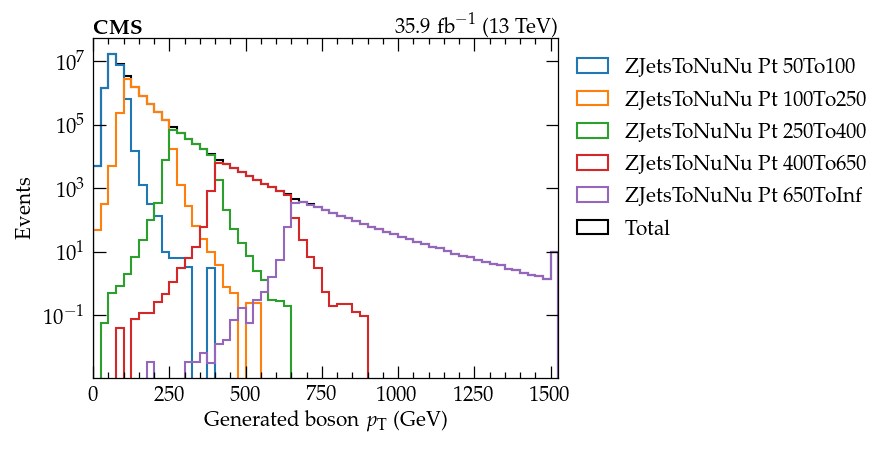

In [72]:
fig, ax = plt.subplots(
    figsize=(4, 3), dpi=150,
)

bins = np.array(list(binning)+[2*binning[-1]-binning[-2]])
for proc in [
    "ZJetsToNuNu_Pt-50To100",
    "ZJetsToNuNu_Pt-100To250",
    "ZJetsToNuNu_Pt-250To400",
    "ZJetsToNuNu_Pt-400To650",
    "ZJetsToNuNu_Pt-650ToInf",
]:
    ax.hist(
        bins[:-1],
        bins = bins,
        weights = df_pivot.loc[:,("sum_w", proc)],
        histtype = 'step',
        label = proc.replace("_", " ").replace("-", " "),
    )
    
ax.hist(
    bins[:-1],
    bins = bins,
    weights = df_pivot.sum(axis=1),
    histtype = 'step',
    color = 'black',
    label = "Total",
    zorder = -1,
)
    
ax.legend(bbox_to_anchor=(1., 1.), loc="upper left")
dftools.draw.cms_label(ax, "")
ax.set_xlabel(r'Generated boson $p_{\mathrm{T}}$ (GeV)')
ax.set_ylabel(r'Events')
ax.set_yscale('log')
ax.set_xlim(bins[0], bins[-1])

In [78]:
binning = np.arange(0., 1501., 25.)

df_merge = dftools.transform.merge(df, {"WJetsToLNu": ["WJetsToENu", "WJetsToMuNu", "WJetsToTauNu"]})
df_slice = df_merge.loc[("central", "GenPartBoson_pt", "Inclusive", "WJetsToLNu")]
df_slice = df_slice.reset_index()
df_slice.loc[:,"sample"] = df_slice["sample"].str.replace("_ext1", "").str.replace("_ext2", "").str.replace("_ext3", "")
df_slice = df_slice.groupby(["sample", "binvar0"]).sum()
df_slice = dftools.transform.rebin(df_slice, binning)
df_pivot = pd.pivot_table(df_slice, values=["sum_w"], index=["binvar0"], columns=["sample"], aggfunc="sum")
df_wj = df_pivot.sum(axis=1)

In [79]:
binning = np.arange(0., 1501., 25.)

df_merge = dftools.transform.merge(df, {"DYJetsToLL": ["DYJetsToEE", "DYJetsToMuMu", "DYJetsToTauLTauL", "DYJetsToTauHTauH", "DYJetsToTauHTauL"]})
df_slice = df_merge.loc[("central", "GenPartBoson_pt", "Inclusive", "DYJetsToLL")]
df_slice = df_slice.reset_index()
df_slice.loc[:,"sample"] = df_slice["sample"].str.replace("_ext1", "").str.replace("_ext2", "").str.replace("_ext3", "")
df_slice = df_slice.groupby(["sample", "binvar0"]).sum()
df_slice = dftools.transform.rebin(df_slice, binning)
df_pivot = pd.pivot_table(df_slice, values=["sum_w"], index=["binvar0"], columns=["sample"], aggfunc="sum")
df_zj = df_pivot.sum(axis=1)

[6.8581441]


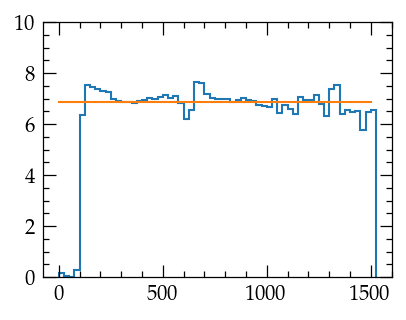

In [92]:
import scipy

fig, ax = plt.subplots(figsize=(3, 2.25), dpi=150)
ratio = df_wj.divide(df_zj)
ax.hist(
    bins[:-1],
    bins = bins,
    weights = ratio,
    histtype = 'step',
)
ax.set_xlim()
ax.set_ylim(0, 10.)

def func(x, p):
    return np.ones_like(x)*p

mask = (bins[:-1]>200.)
popt, pcov = scipy.optimize.curve_fit(func, bins[:-1][mask], ratio[mask])
ax.plot(bins[:-1], func(bins[:-1], *popt))
print(popt)

pass

In [93]:
binning = np.arange(0., 1501., 25.)

df_slice = df_merge.loc[("central", "GenPartBoson_pt", "Inclusive", "WJetsToENu")]
df_slice = df_slice.reset_index()
df_slice.loc[:,"sample"] = df_slice["sample"].str.replace("_ext1", "").str.replace("_ext2", "").str.replace("_ext3", "")
df_slice = df_slice.groupby(["sample", "binvar0"]).sum()
df_slice = dftools.transform.rebin(df_slice, binning)
df_pivot = pd.pivot_table(df_slice, values=["sum_w"], index=["binvar0"], columns=["sample"], aggfunc="sum")
df_we = df_pivot.sum(axis=1)

df_slice = df_merge.loc[("central", "GenPartBoson_pt", "Inclusive", "WJetsToMuNu")]
df_slice = df_slice.reset_index()
df_slice.loc[:,"sample"] = df_slice["sample"].str.replace("_ext1", "").str.replace("_ext2", "").str.replace("_ext3", "")
df_slice = df_slice.groupby(["sample", "binvar0"]).sum()
df_slice = dftools.transform.rebin(df_slice, binning)
df_pivot = pd.pivot_table(df_slice, values=["sum_w"], index=["binvar0"], columns=["sample"], aggfunc="sum")
df_wm = df_pivot.sum(axis=1)

df_slice = df_merge.loc[("central", "GenPartBoson_pt", "Inclusive", "WJetsToTauNu")]
df_slice = df_slice.reset_index()
df_slice.loc[:,"sample"] = df_slice["sample"].str.replace("_ext1", "").str.replace("_ext2", "").str.replace("_ext3", "")
df_slice = df_slice.groupby(["sample", "binvar0"]).sum()
df_slice = dftools.transform.rebin(df_slice, binning)
df_pivot = pd.pivot_table(df_slice, values=["sum_w"], index=["binvar0"], columns=["sample"], aggfunc="sum")
df_wt = df_pivot.sum(axis=1)

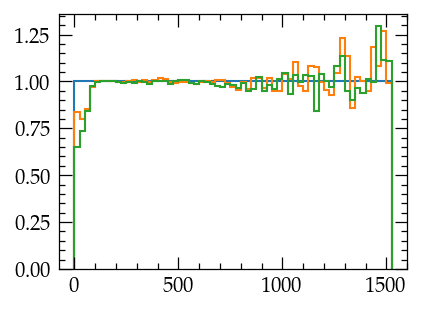

In [95]:
fig, ax = plt.subplots(figsize=(3, 2.25), dpi=150)
ax.hist(
    bins[:-1],
    bins = bins,
    weights = df_we.divide(df_we),
    histtype = 'step',
    label = r'$e$',
)
ax.hist(
    bins[:-1],
    bins = bins,
    weights = df_wm.divide(df_we),
    histtype = 'step',
    label = r'$\mu$',
)
ax.hist(
    bins[:-1],
    bins = bins,
    weights = df_wt.divide(df_we),
    histtype = 'step',
    label = r'$\tau$',
)
pass